# Анализ факторов успешности видеоигр для магазина «Стримчик»

### Описание проекта:
Проект предназначен для интернет-магазина "Стримчик", занимающегося продажей компьютерных игр по всему миру. В основе анализа находятся исторические данные о продажах игр, оценки пользователей и критиков, а также информация о жанрах и платформах (например, Xbox и PlayStation). Цель исследования — выявление ключевых факторов, влияющих на успех игр, что поможет рекомендовать потенциально популярные продукты и планировать эффективные рекламные кампании.

Данные охватывают период до 2016 года и используются для подготовки к кампаниям на 2017 год. Включены продажи по регионам, оценки и рейтинги ESRB, помогающие определить возрастную аудиторию игры. Исследование применимо вне зависимости от года анализа данных.

### Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы копий)
- EU_sales — продажи в Европе (миллионы копий)
- JP_sales — продажи в Японии (миллионы копий)
- Other_sales — продажи в других странах (миллионы копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — возрастной рейтинг по версии ESRB

Данные за 2016 год могут быть неполными, что предполагает более внимательное рассмотрение.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

### Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: _/datasets/games.csv_.

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
def get_info(data: pd.DataFrame):
    print('Info about data:')
    data.info()
    print('\nInfo about missing data:\n', data.isna().sum())
    print('\nInfo about duplicates:\n', data.duplicated().sum())

Рассмотрим какие данные у нас имеются и каким образом они заполнены - рассмотрим более детально данные с пропусками

In [4]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
get_info(games)

Info about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Info about missing data:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Criti

Рассмотрим какие данные представлены среди пропусков

In [6]:
games.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
games.query('Critic_Score.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
games.query('User_Score.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
games.query('Rating.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Рассмотрим так же на каких платформах у нас представлены данные и каких жанров игры

In [10]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Вывод:**

В датасете 11 столбцов, в которых содержатся названия игр и их оценки от различных издательств, пользователей и прочего. Часть информации пропущена в столбцах `Name` одновременно с пропуском в столбце `Genre`, `Year_of_Release`, `Critic_Score`, `User_Score` и `Rating` это будет необходимо исправить в дальнейшем.

Были более детально рассмотрены жанры и платформы прдставленных игр. Рассмотрены данные с пропусками.

### **Шаг 2. Подготовьте данные**
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Проведем замену столбцов, приведя их к нижнему регистру, пройдя по ним через цикл

In [12]:
names = dict()
for col_name in games.columns:
    names[col_name] = col_name.lower()

In [13]:
games = games.rename(columns=names)

Еще раз рассмотрим внимательно какие есть столбцы и какого типа данные в них находятся

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Еще раз посмотрим на количество пропусков и рассмотрим данные для этих столбцов более детально

In [15]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [16]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Год из столбца `year_of_release` представляет собой целое число, поэтому заменим тип данных на целочисленный. Для столбца `user_score` необходимо заменить тип на вещественный, так как в оценках пользователей есть дробная часть у чисел

In [17]:
games['year_of_release'].isna().sum() / len(games) * 100

1.609332934489979

В данных потеряно 269 данных, что является 2% от общего количества данных. Год выпуска нельзя заполнить, эти данные необходимо удалить и заменить тип данных на целочисленный

In [18]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [19]:
games = games.dropna(subset=['year_of_release'])

In [20]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Рассмотрим внимательнее данные с `user_score` == `tbd`. Данная аббривеатура обозначает "To be decided" или "To be Determined", то есть она будет определена в дальнейшем и эти данные не заполнены, поскольку сейчас нет оценки пользоателей. Поскольку пустые значения в этом столбце определены как Nan, то логично будет заполнить и эти данные на пустые значения.

In [21]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [22]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [23]:
games['user_score'] = games['user_score'].astype(float)

In [24]:
games.query('name.isna() | genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Для данных, у которых пропущен жанр и название игры заполнить эти пропуски невозможно. Поэтому эти строки в количестве двух штук необходимо удалить.

In [25]:
games = games.dropna(subset=['name'])

In [26]:
duplicates = games[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Был обнаружен неявный дубликат в виде игры `Madden NFL 13`. Объединим данные по продажам для этой игры и уберем повтор.

In [27]:
games.loc[604, ['na_sales', 'eu_sales', 'jp_sales']] = games.loc[[604, 16230], ['na_sales', 'eu_sales', 'jp_sales']].sum()

In [28]:
games.drop(16230, inplace=True)
games.reset_index(drop=True, inplace=True)

Рассчитаем глобальные продажи для каждой игры:

In [29]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

**Вывод:**

 - Были переименованы столбцы к стандарту, те без использования заглавных букв
 - Заменены типы данных для столбцов `year_of_release` и `user_score` на целочисленный и вещественный соответственно
 - Для столбца `year_of_release` пропуски, которые составляли 2% от общего числа данных было решено удалить, из-за невозможности их заполнить
 - Для пропусков в столбцах `Year_of_Release`, `Name` и `Genre` было принято решение удалить данные из-за невозможности их заполнить
 - Пропуски в данных `Critic_Score`, `User_Score` и `Rating` могут быть из-за отсутствия оценки. Эти данные являются большой частью данных, поэтому удалить их нельзя
 - Была проведена проверка на неявные дубликаты, которые совпадают по названию игры, платформы и году выпуска. Продажи были просуммированы для найденной игры и удален повтор.
 - Рассчитаны глобальные продажи игр

### **Шаг 3. Проведите исследовательский анализ данных**

Рассмотрим какое количество игр выпускалось в различные года и построим гистограмму по годам, чтобы было визуально понятно

In [30]:
pivot_years = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
pivot_years.columns = ['count']

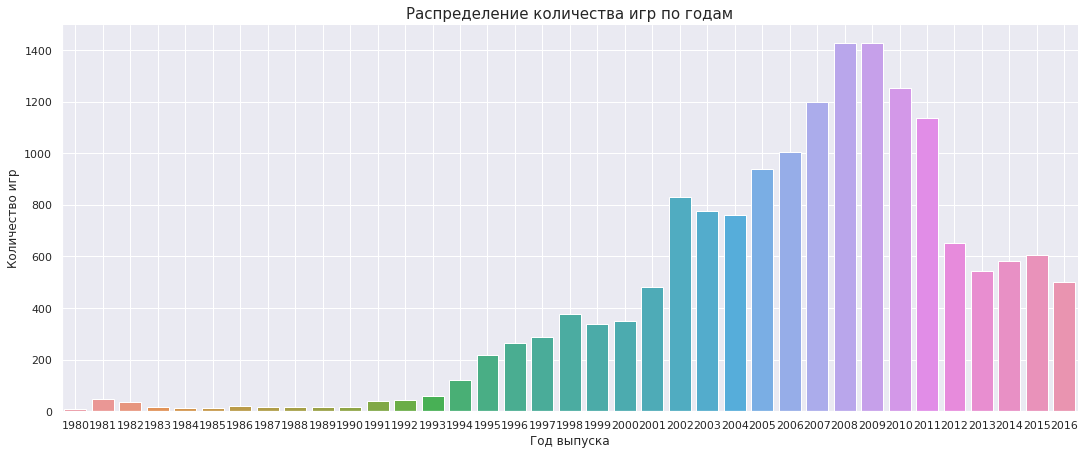

In [31]:
sns.set_theme()
sns.set_palette("Set2")
sns.catplot(data=pivot_years, x=pivot_years.index, y=pivot_years['count'], height=6, aspect=2.5, kind='bar')
plt.grid(True)
plt.title('Распределение количества игр по годам', fontsize=15)
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска');

Посмотрим теперь, как распределяются игры по платформам и далее построим распределение по годам для платформ

In [32]:
pivot_platform = games.pivot_table(index='platform', values=['total_sales'], aggfunc='sum')
pivot_platform.columns = ['sale']
pivot_platform = pivot_platform.sort_values(by='sale', ascending=False)

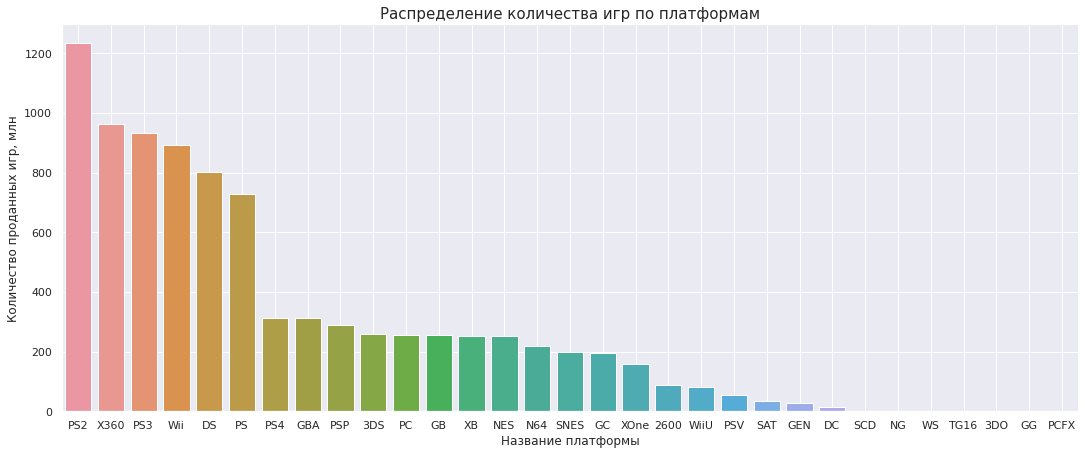

In [33]:
sns.catplot(data=pivot_platform, x=pivot_platform.index, y=pivot_platform['sale'], height=6, aspect=2.5, kind='bar')
plt.title('Распределение количества игр по платформам', fontsize=15)
plt.grid(True)
plt.ylabel('Количество проданных игр, млн')
plt.xlabel('Название платформы');

In [34]:
platforms = list(pivot_platform.query('sale > 500').index)

Теперь для платформ `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS` построим распределение по годам

In [35]:
pivot_platform = games.pivot_table(index='platform', values=['total_sales'], aggfunc='sum')

In [36]:
best_platform = games.query('platform in @platforms')[['year_of_release', 'platform', 'total_sales']].pivot_table(
    columns='platform',
    index='year_of_release',
    values='total_sales',
    aggfunc='sum'
)

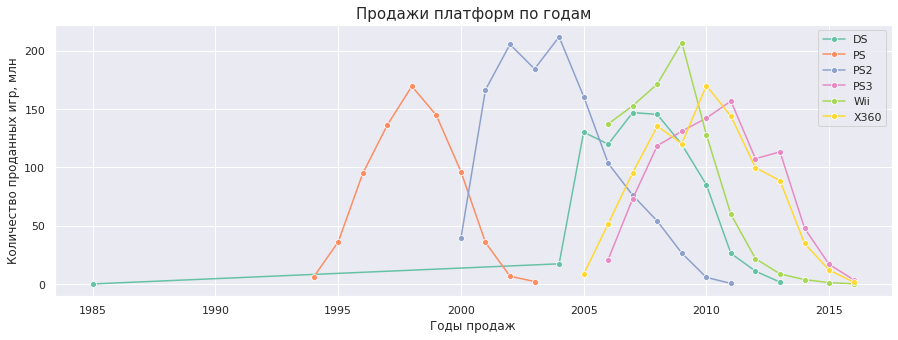

In [37]:
sns.set_theme()
sns.set_palette("Set2")
plt.figure(figsize=(15, 5))

for col in best_platform.columns:
    sns.lineplot(data=best_platform, x=best_platform.index, y=col, label=col, marker='o')

plt.grid(True)
plt.title('Продажи платформ по годам', fontsize=15)
plt.ylabel('Количество проданных игр, млн')
plt.xlabel('Годы продаж');

На графике можно оценить, что в среднем срок работы одной платформы - 10 лет. Самыми популярными и успешными в продаже являются платформы `PS2`, `X360`. Для платформы `Wii` можно заметить заметный скачок в 2008 году и после стремительный спад продаж.
Заметно, как за пять лет продажи платформы растут, а в следующие пять лет постепенно или стремительно снижаются

In [38]:
round(best_platform.notna().sum().mean(), 0)

11.0

Проведя аналитические рассчеты, мы выяснили что средний срок жизни платформы 11 лет

Поскольку рост платформы происходит в течение 5 лет с момента появляения, то для получения максимальных продаж необходимо выделить платформы, возникшие за последние три года.

In [39]:
all_platforms = list(games.loc[games['year_of_release'] >= 2010, "platform"].unique())
all_platforms

['X360',
 'PS3',
 'DS',
 'PS4',
 '3DS',
 'Wii',
 'XOne',
 'WiiU',
 'PC',
 'PSP',
 'PSV',
 'PS2']

In [40]:
best_platform = (games
                 .query(f'platform in {all_platforms}')[['year_of_release', 'platform', 'total_sales']]
                 .pivot_table(
    columns='platform',
    index='year_of_release',
    values='total_sales',
    aggfunc='sum'
))

best_platform = best_platform.reset_index(drop=False)
best_platform = best_platform.loc[best_platform["year_of_release"] > 2010].dropna(axis=1, how='all')

Дропнем столбцы, если у нас идет убывание продаж в ноль за последние пять лет. То есть дропнем столбцы `DS`, `PS2`, `PSP`, `Wii`

In [41]:
best_platform = best_platform.drop(columns=['DS', 'PS2', 'PSP', 'Wii'])

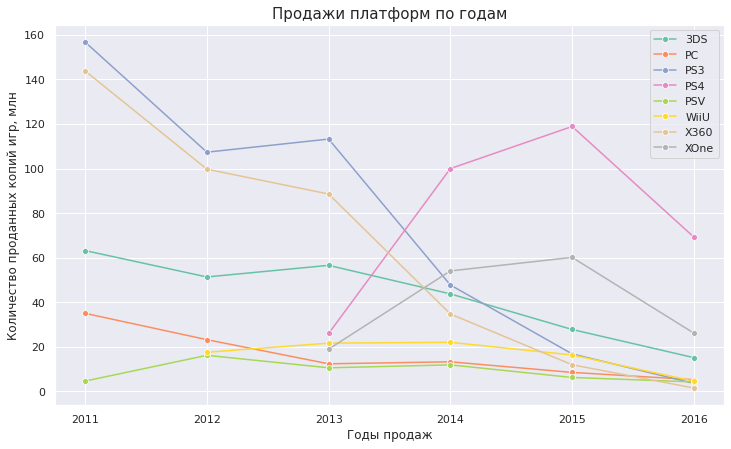

In [42]:
actual_platforms = []

plt.figure(figsize=(12, 7))
for col in best_platform.columns:
    if col != 'year_of_release':
        sns.lineplot(data=best_platform, x='year_of_release', y=col, label=col, marker='o')
        actual_platforms.append(col)

plt.grid(True)
plt.title('Продажи платформ по годам', fontsize=15)
plt.ylabel('Количество проданных копий игр, млн')
plt.xlabel('Годы продаж');



In [43]:
top_platforms = ['PS4', 'XOne', 'WiiU']

In [44]:
games_actual = games.loc[games['year_of_release'] > 2012].dropna(axis=1, how='all')

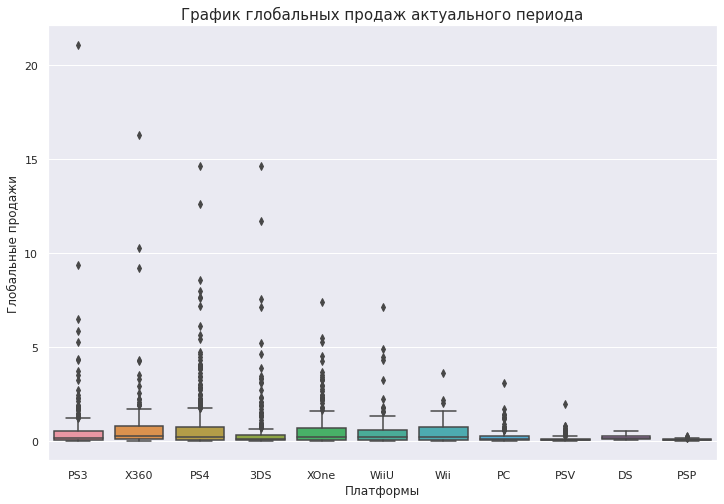

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(data=games_actual, x='platform', y='total_sales')
plt.title('График глобальных продаж актуального периода', fontsize=15)
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформы');

- Продажи платформ распределяются в порядке возрастания прибыли таким образом: `PS3`, `X360`, `PS4`, `3DS`, `XOne`, `WiiU` и остальные
- Для трех самых популярных платформ медиана расположена в районе значения 0.2

In [46]:
for plat in actual_platforms:
    print(f'Median for {plat}', round(games_actual.query(f'platform == "{plat}"')["total_sales"].median(), 2))

Median for 3DS 0.09
Median for PC 0.08
Median for PS3 0.15
Median for PS4 0.2
Median for PSV 0.04
Median for WiiU 0.2
Median for X360 0.26
Median for XOne 0.22


In [47]:
actual_platforms

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne']

Для платформы `PS4` рассмотрим корреляцию между отзывами критиков, пользователей и продажами для промежутка продаж с 2013 года

In [48]:
def corr_platform(data: pd.DataFrame, plat_name: str):
    data_plat = data.query(f'platform == "{plat_name}"')
    user_corr = round(data_plat['user_score'].corr(data_plat['total_sales']), 2)
    critic_corr = round(data_plat['critic_score'].corr(data_plat['total_sales']), 2)
    print(f'- `user_score` от `total_sales` {user_corr}\n- `critic_score` от `total_sales` {critic_corr}')
    ru_titles = ['Оценки пользователей', 'Оценки критиков']

    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(f'Графики корреляции для {plat_name}', fontsize=15)
    for num, param in enumerate(['user_score', 'critic_score']):
        sns.scatterplot(data=data_plat, x=param, y='total_sales',  ax=axes[num])
        axes[num].set_title(f'{ru_titles[num]} от продаж')
        axes[num].set_ylabel('Кол-во проданных копий, млн')
        axes[num].set_xlabel(f'{ru_titles[num]}')
    return(user_corr, critic_corr)


In [49]:
user_coor = dict()
crit_corr = dict()

In [50]:
sns.set_palette("viridis", 8)

- `user_score` от `total_sales` -0.03
- `critic_score` от `total_sales` 0.41


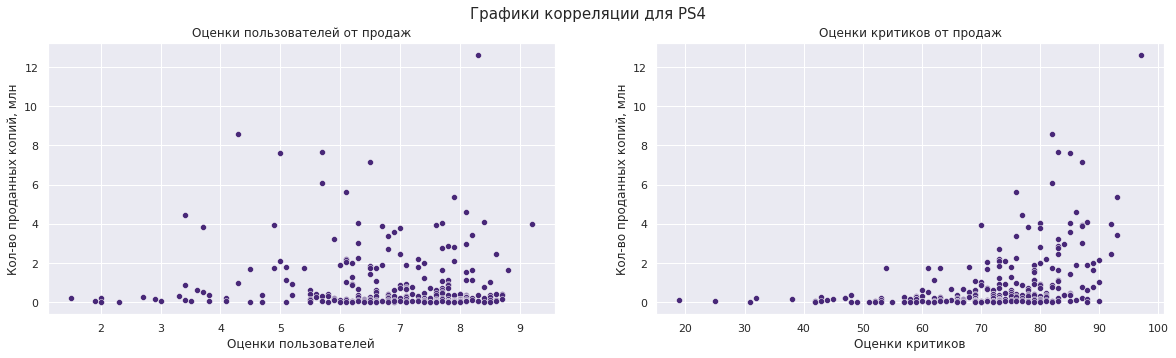

In [51]:
user_coor['PS4'], crit_corr['PS4'] = corr_platform(games_actual, "PS4")

Корреляция для `PS4`:
- `user_score` от `total_sales` -0.03
- `critic_score` от `total_sales` 0.41

На примере данной платформы мы видим, что продажи не зависят от оценок пользователей, однако прослеживается слабая корреляция между оценками критиков и продажами. Проверим эту гипотезу на остальных платформах, рассчитав параметры корреляции и вычислив среднее и медиану для всех платформ

- `user_score` от `total_sales` -0.01
- `critic_score` от `total_sales` 0.35


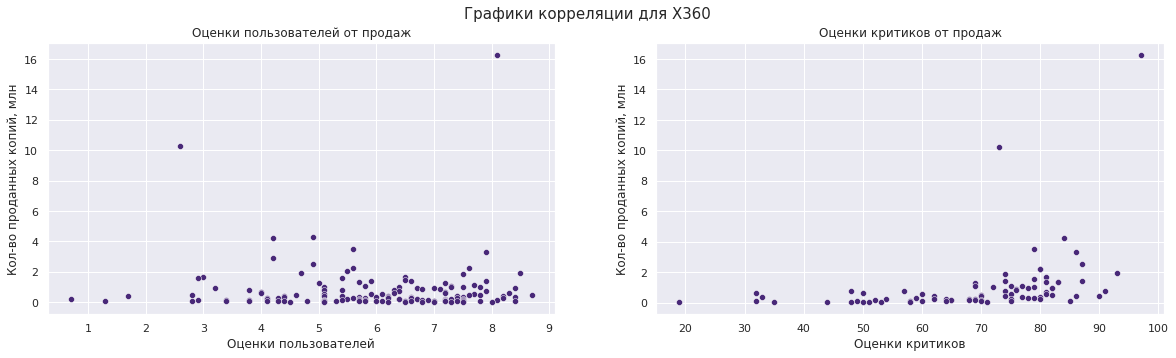

In [52]:
user_coor['X360'], crit_corr['X360'] = corr_platform(games_actual, "X360")

- `user_score` от `total_sales` -0.07
- `critic_score` от `total_sales` 0.42


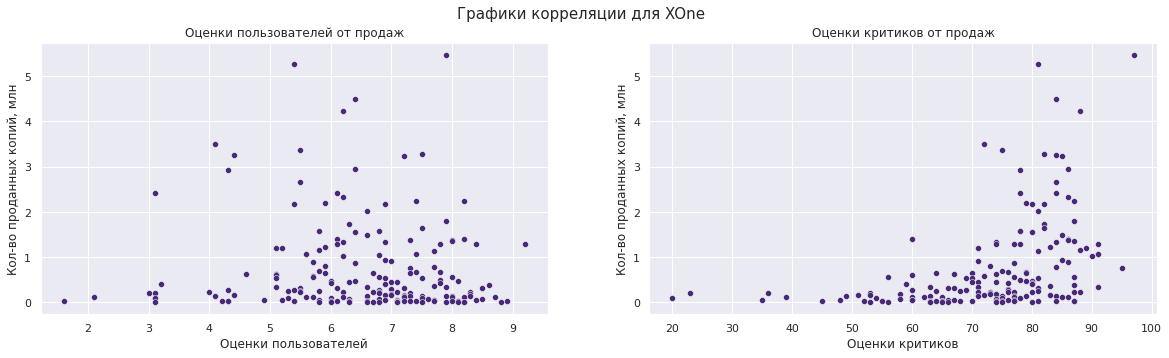

In [53]:
user_coor['XOne'], crit_corr['XOne'] = corr_platform(games_actual, "XOne")

- `user_score` от `total_sales` 0.42
- `critic_score` от `total_sales` 0.38


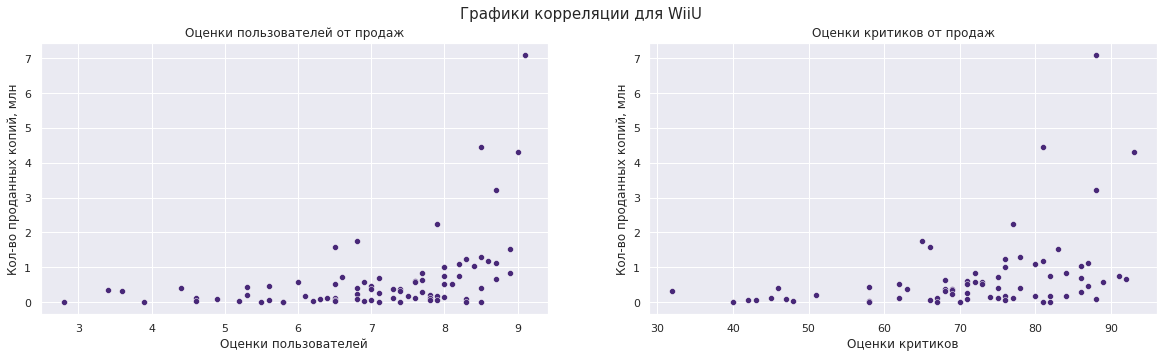

In [54]:
user_coor['WiiU'], crit_corr['WiiU'] = corr_platform(games_actual, "WiiU")

- `user_score` от `total_sales` 0.24
- `critic_score` от `total_sales` 0.36


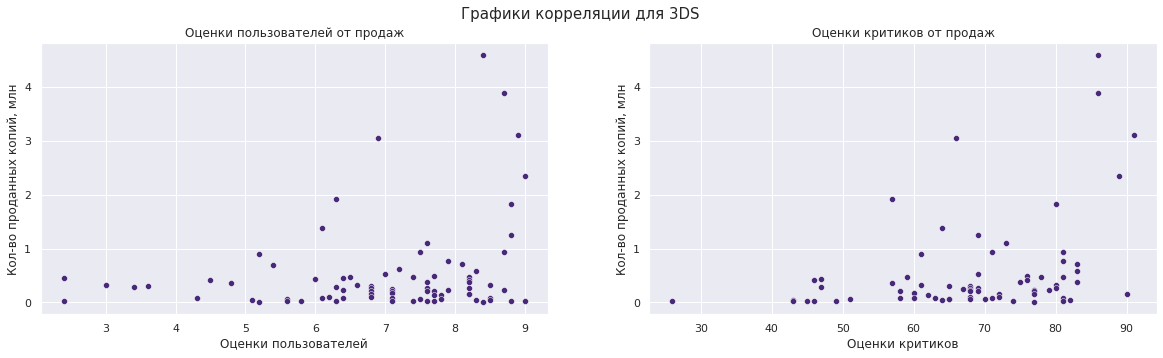

In [55]:
user_coor['3DS'], crit_corr['3DS'] = corr_platform(games_actual, "3DS")

- `user_score` от `total_sales` -0.09
- `critic_score` от `total_sales` 0.2


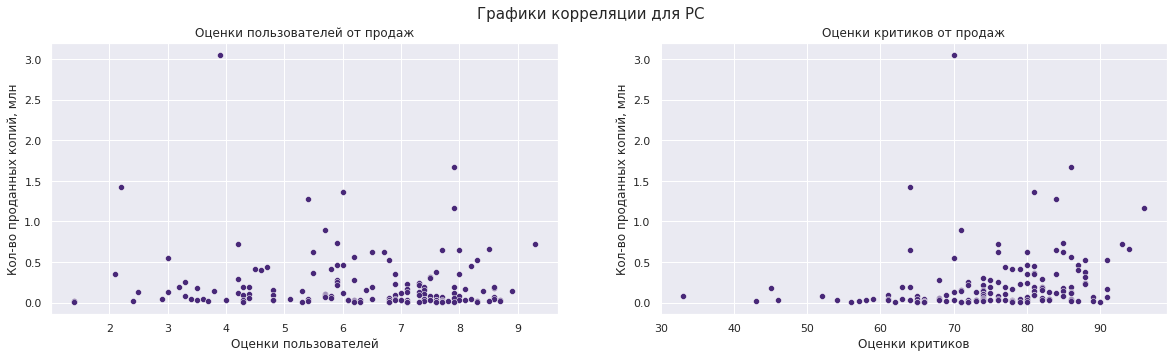

In [56]:
user_coor['PC'], crit_corr['PC'] = corr_platform(games_actual, "PC")

- `user_score` от `total_sales` 0.0
- `critic_score` от `total_sales` 0.33


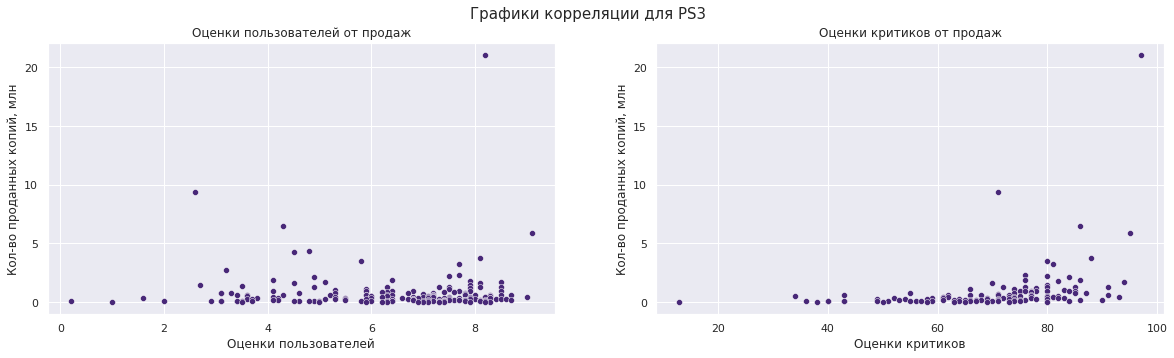

In [57]:
user_coor['PS3'], crit_corr['PS3'] = corr_platform(games_actual, "PS3")

- `user_score` от `total_sales` 0.0
- `critic_score` от `total_sales` 0.25


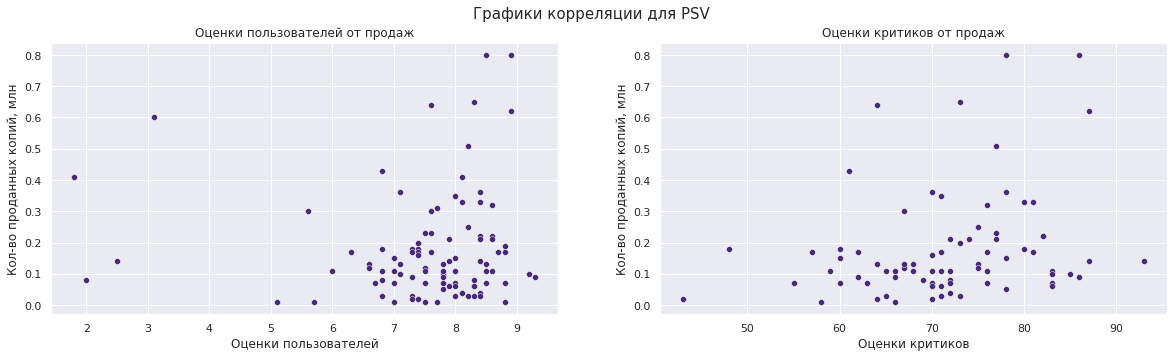

In [58]:
user_coor['PSV'], crit_corr['PSV'] = corr_platform(games_actual, "PSV")

In [59]:
user_corr = pd.DataFrame.from_dict(user_coor, orient='index').rename(columns={0: 'corr'})
user_corr

,corr
PS4,-0.03
X360,-0.01
XOne,-0.07
WiiU,0.42
3DS,0.24
PC,-0.09
PS3,0.00
PSV,0.00


In [60]:
user_corr.median()

corr   -0.005
dtype: float64

In [61]:
user_corr.mean()

corr    0.0575
dtype: float64

Проанализировав значение кореляции оценок пользователей от продаж, можно сделать вывод, что корреляция в среднем отсутствует, за исключением некоторых платформ. Значит от оценок пользователей продажи не зависят или зависят в очень малой степени

In [62]:
crit_corr = pd.DataFrame.from_dict(crit_corr, orient='index').rename(columns={0: 'corr'})
crit_corr

,corr
PS4,0.41
X360,0.35
XOne,0.42
WiiU,0.38
3DS,0.36
PC,0.20
PS3,0.33
PSV,0.25


In [63]:
crit_corr.median()

corr    0.355
dtype: float64

In [64]:
crit_corr.mean()

corr    0.3375
dtype: float64

В отличии от оценок пользователей, оценки критиков вляют на продажи - наблюдается средняя положительная корреляция продаж от оценок критиков, те при хороших оценках растут продажи

Рассмотрим теперь общее распределение игр по жанрам - те для всех платформ, но на период после 2012 года, просуммируем кол-во проданных копий, медианное значение проданных копий, кол-во выпущенных игр п жанрам и  и выведем это в виде графика

In [65]:
genre = (games
         .query('year_of_release > 2012')
         .pivot_table(index='genre', 
                      values=['total_sales', 'name'], 
                      aggfunc={'total_sales': ['sum', 'median'], 'name': 'count'})
         .reset_index(drop=False))
genre.columns = ['genre', 'amount_games', 'sales_median', 'sales_sum']
genre = genre.sort_values(by='sales_sum', ascending=False)

In [66]:
genre

,genre,amount_games,sales_median,sales_sum
0,Action,766,0.110,321.87
8,Shooter,187,0.450,232.98
10,Sports,214,0.240,150.65
7,Role-Playing,292,0.125,145.89
3,Misc,155,0.100,62.82
4,Platform,74,0.225,42.63
6,Racing,85,0.120,39.89
2,Fighting,80,0.125,35.31
1,Adventure,245,0.030,23.64
9,Simulation,62,0.100,21.76


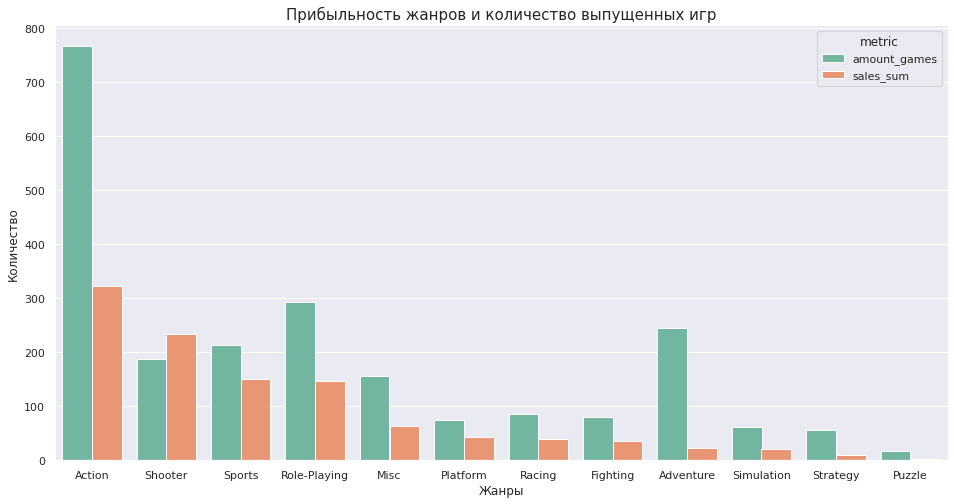

In [67]:
sns.set_palette("Set2")
plt.figure(figsize=(16, 8))
sns.barplot(data=genre
                .drop(columns=['sales_median'])
                .sort_values(by='sales_sum', ascending=False)
                .melt(id_vars='genre', var_name='metric', value_name='value'), 
            x='genre', 
            y='value', 
            hue='metric')
plt.title('Прибыльность жанров и количество выпущенных игр', fontsize=15)
plt.ylabel('Количество')
plt.xlabel('Жанры');

Самым частым выпускаемым жанром является `Action`, в топ пять так же входят `Adventure`, `Role-Playing`, `Sports` и `Shooter` по убыванию количества выпущенных игр. Последнее место по количеству изданных игр занимает жанр `Puzzle`

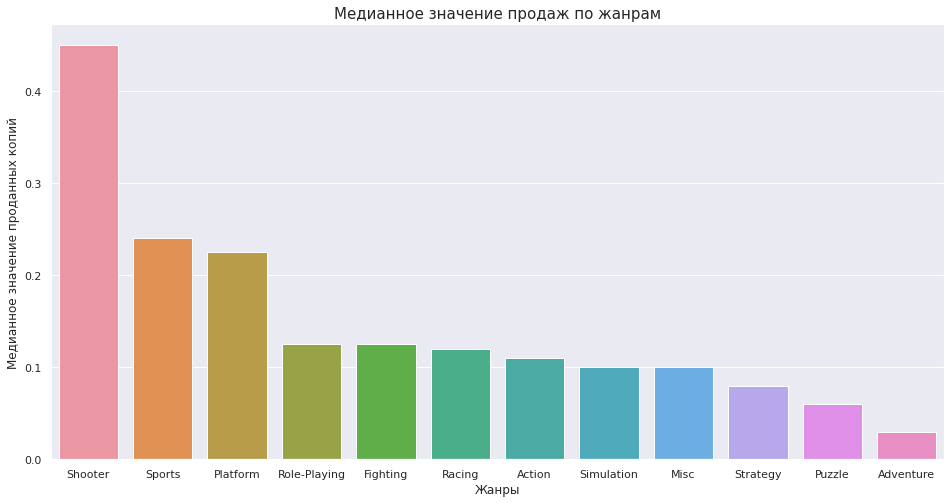

In [68]:
plt.figure(figsize=(16, 8))
sns.barplot(data=genre.sort_values(by='sales_median', ascending=False),
            x='genre', 
            y='sales_median')
plt.title('Медианное значение продаж по жанрам', fontsize=15)
plt.ylabel('Медианное значение проданных копий')
plt.xlabel('Жанры');

Построив медианные значения продаж по жанрам, мы замечаем, что самым продаваемым жанром является `Schooter` и далее идут `Sports`, `Platform`, `Role_playing`, `Fighting`

**Вывод**:
 - В ходе исследования данных были построены графики распределения количества игр по годам, количество игр для платформы за весь промежуток от 1985 до 2015 года. На основе этих данных был построен график зависимости продаж по годам. Была выяснена средняя продолжительность популярности платформы - 10 - 11 лет, с ростом популярности в течение 5 лет и спадом интереса так же за 5 лет. На основании этого были выделены актуальные данные для исследования - с 2013 года. В результате этого выделения осталось 3 платформы:  `PS4`, `XOne`, есть шансы у `WiiU`
 - Продажи платформ распределяются в порядке возрастания прибыли таким образом: `PS3`, `X360`, `PS4`, `3DS`, `XOne`
 - На примере платформы `PS4` было заметно, что продажи слабо зависят от оценок пользователей, однако прослеживается высокая корреляция между оценками критиков и продажами:
    - `user_score` от `total_sales` -0.03
    - `critic_score` от `total_sales` 0.41
    Аналогичная зависимость была заметна для остальных платформ. Оценки критиков влияют на продажи игр для платформ, в отличие от отзывов пользователей
    - медианное значение корреляции для всех платформ от оценок пользователей: -0.005
    - медианное значение корреляции для всех платформ от оценок критиков: 0.355
 - Были рассмотрены продажи игр в зависимости от жанра. В результате топ-5 жанров по продажам составляют:
     - `Schooter`
     - `Sports`
     - `Platform`
     - `Role_playing`
     - `Fighting`

### **Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (_NA, EU, JP_):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
games_actual['rating'].fillna('None', inplace=True)

In [70]:
sns.set_palette("husl", 9)

In [71]:
def portrait_user(data, region):
    print(f'Информация за актуальный период для {region}')
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Топ 5 платформ, жанров и рейтинг ESRB от продаж в регионе {region} за актуальный период', fontsize=15)
    for num, param in enumerate(['platform', 'genre', 'rating']):
        region_pivot = data.pivot_table(index=param, values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index(drop=False)
        other_sales = region_pivot[5:][region].sum()
        region_pivot = region_pivot[:5]
        region_pivot.loc[len(region_pivot)] = ['Other', other_sales]
        
        print(region_pivot, '\n')
        
        if param == 'platform':
            axes[num].pie(region_pivot[region], labels=region_pivot['platform'], autopct='%.0f%%', radius=1)     
        else:
            sns.barplot(data=region_pivot[:5], 
                        x=param, 
                        y=region, 
                        ax=axes[num])

        title = ['платформы', 'жанры', 'рейтинг ESRB']         
        axes[num].set_title(f'Топ-5 {title[num]} от продаж', fontsize=15)
        
    for num in range(1, 3):
        axes[num].set_ylabel('Кол-во проданных копий, млн')
        axes[num].set_xlabel(title[num])
    

Информация за актуальный период для na_sales
  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20
5    Other     52.49 

          genre  na_sales
0        Action    126.05
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.49
5         Other     62.76 

  rating  na_sales
0      M    165.21
1   None     89.42
2      E     79.05
3   E10+     54.24
4      T     49.79
5  Other      0.00 



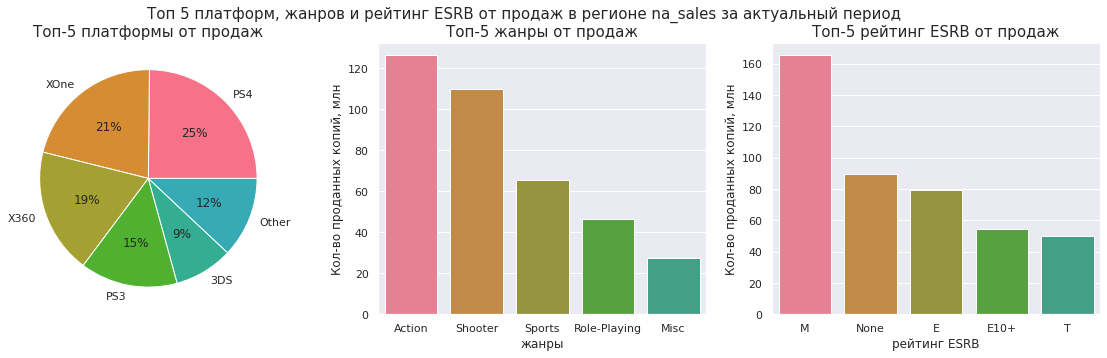

In [72]:
portrait_user(games_actual, 'na_sales')

Портрет пользователя из Северной Америки:
- Самые популярные платформы (топ-5) за актуальный период:
    - `PS4`, `XOne`, `X360`, `PS3`, `3DS`
- Самые популярные жанры (топ-5) за весь период:
    - `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`
- Самые большие продажи были для игр с рейтингом ESRB: 
    - `Mature 17+`, `None`, `Everyone`, `Everyone  10+` и `Teen`, рейтинги расположены в порядке убывания.

Информация за актуальный период для jp_sales
  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88
5    Other      4.19 

          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61
5         Other     25.79 

  rating  jp_sales
0   None     85.05
1      T     20.59
2      E     15.14
3      M     14.11
4   E10+      5.89
5  Other      0.00 



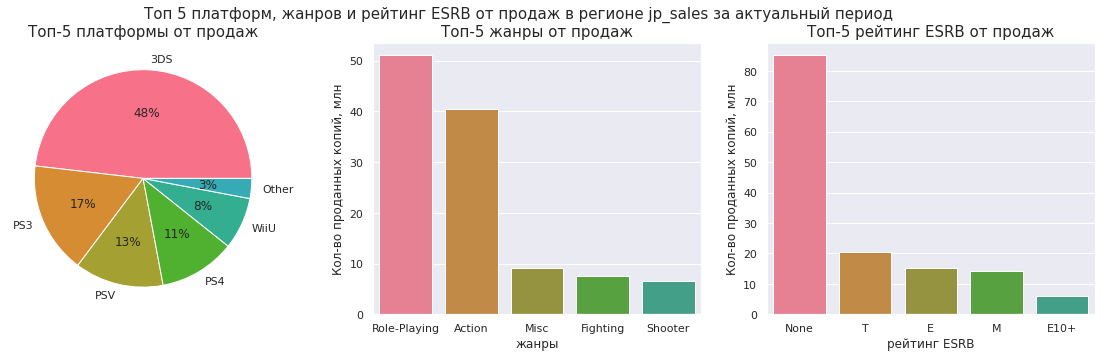

In [73]:
portrait_user(games_actual, 'jp_sales')

Портрет пользователя из Японии:
- Самые популярные платформы (топ-5) за актуальный период:
    - `3DS`, `PS3`, `PSV`, `PS4`, `WiiU`
- Самые популярные жанры (топ-5) за весь период:
    - `Role-Playing`, `Action`, `Misc`, `Fighting`, `Shooter`, 
- Самые большие продажи были для игр с рейтингом ESRB: 
    - `None`, `Teen (T)`, `Everyone (E)`, `Mature 17+` и `Everyone 10+ `

Информация за актуальный период для eu_sales
  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96
5    Other     58.26 

          genre  eu_sales
0        Action    118.13
1       Shooter     87.86
2        Sports     60.52
3  Role-Playing     36.97
4        Racing     20.19
5         Other     68.56 

  rating  eu_sales
0      M    145.32
1      E     83.36
2   None     78.91
3   E10+     42.69
4      T     41.95
5  Other      0.00 



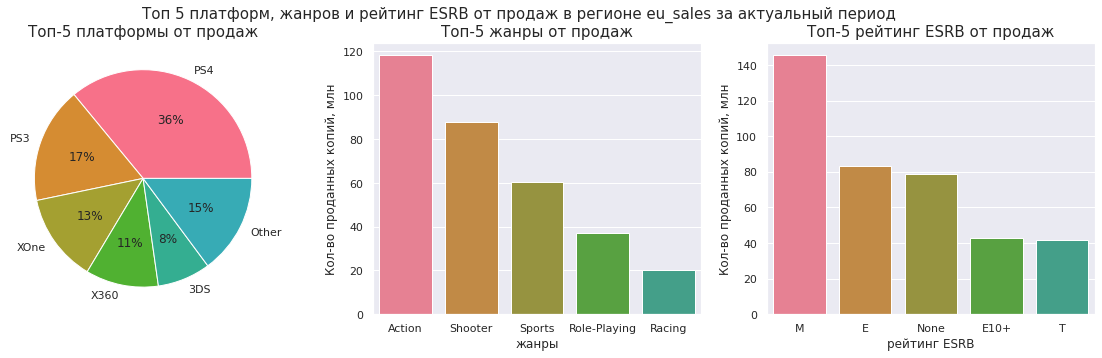

In [74]:
portrait_user(games_actual, 'eu_sales')

Портрет пользователя из Европы:

- Самые популярные платформы (топ-5) за актуальный период:
    - `PS4`, `PS3`, `XOne`, `X360`, `3DS`
- Самые популярные жанры (топ-5) за весь период:
    - `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
- Самые большие продажи были для игр с рейтингом ESRB: 
    - `Mature 17+`, `Everyone`, `None`, `Everyone 10+`, `Teen`

**Вывод**:
- Портрет пользователя из Северной Америки:
    - Самые популярные платформы (топ-5) за актуальный период:
        - `PS4`, `XOne`, `X360`, `PS3`, `3DS`
    - Самые популярные жанры (топ-5) за весь период:
        - `Action`, `Shooter`, `Sports`, `Role-Playing`, `Misc`
    - Самые большие продажи были для игр с рейтингом ESRB: 
        - `Mature 17+`, `None`, `Everyone`, `Everyone  10+` и `Teen`, рейтинги расположены в порядке убывания.

- Портрет пользователя из Японии:
    - Самые популярные платформы (топ-5) за актуальный период:
        - `3DS`, `PS3`, `PSV`, `PS4`, `WiiU`
    - Самые популярные жанры (топ-5) за весь период:
        - `Role-Playing`, `Action`, `Misc`, `Fighting`, `Shooter`, 
    - Самые большие продажи были для игр с рейтингом ESRB: 
        - `None`, `Teen (T)`, `Everyone (E)`, `Mature 17+` и `Everyone 10+ `
    
- Портрет пользователя из Европы:
    - Самые популярные платформы (топ-5) за актуальный период:
        - `PS4`, `PS3`, `XOne`, `X360`, `3DS`
    - Самые популярные жанры (топ-5) за весь период:
        - `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
    - Самые большие продажи были для игр с рейтингом ESRB: 
        - `Mature 17+`, `Everyone`, `None`, `Everyone 10+`, `Teen`
    
    
    
Игру стоит выпускать на `PS4`, таким образом она будет популярна во всех регионах и наиболее выгодный жанр за последние пять лет: `Action` или `Shooter`. Наиболее покупаемые игры с рейтингами `TEEN`, `MATURE`, однако заметно, что в рейтинг ESRB не может показать полную картину - в Японии самые продаваемые игры без американского рейтинга, в Америке игры без рейтинга на втором месте, в Европе на третьем

### **Шаг 5. Проверьте гипотезы**

- Средние пользовательские рейтинги платформ _Xbox One_ и _PC_ одинаковые;
- Средние пользовательские рейтинги жанров _Action_ (англ. «действие», экшен-игры) и _Sports_ (англ. «спортивные соревнования») разные.

Будем использовать гипотезу о равенстве средних двух генеральных совокупностей, поскольку у нас две выборки данных, не зависящих друг от друга

Сформулируем гипотезы:
  - Н_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Н_1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [75]:
alpha = 0.01

xbox_one = games_actual.query('platform == "XOne"')['user_score']
pc = games_actual.query('platform == "PC"')['user_score']

result_theory_1 = st.ttest_ind(xbox_one, pc, equal_var=False, nan_policy='omit')

if result_theory_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(f'pvalue: {round(result_theory_1.pvalue, 2)}\nmean PC {round(pc.mean(), 2)}\nmean XOne {round(xbox_one.mean(), 2)}')

Не получилось отвергнуть нулевую гипотезу
pvalue: 0.15
mean PC 6.27
mean XOne 6.52


Соответственно можно с вероятностью 4% получить различные пользовательские рейтинги для двух платформ, c большой долей вероятности средние пользовательские рейтинги XOne и PC не имеют статистически значимых значений

Сформулируем гипотезы:
 - Н_0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
 - Н_1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [76]:
action = games_actual.query('genre == "Action"')['user_score']
sports = games_actual.query('genre == "Sports"')['user_score']

result_theory_2 = st.ttest_ind(action, sports, equal_var=False, nan_policy='omit')

if result_theory_2.pvalue< alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(f'pvalue: {round(result_theory_1.pvalue, 2)}\nmean action {round(action.mean(), 2)}\nmean sports {round(sports.mean(), 2)}')

Отвергаем нулевую гипотезу
pvalue: 0.15
mean action 6.84
mean sports 5.24


Соответственнно средние пользовательские рейтинги для жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются

**Вывод**:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза подтверждена
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - гипотеза подтверждена

### **Шаг 6. Напишите общий вывод**

**Описание работы:**
- На первом шаге было реализованно общее знакомство с информацией, необходимого для дальнейшего анализа
- На втором шаге была проведена подготовка данных к анализу, а именно:
    - Были переименованы столбцы к стандарту, те без использования заглавных букв
     - Заменены типы данных для столбцов `year_of_release` и `user_score` на целочисленный и вещественный соответственно
     - Для столбца `year_of_release` пропуски, которые составляли 2% от общего числа данных было решено удалить, из-за невозможности их заполнить
     - Для пропусков в столбцах `Name` и `Genre` было принято решение удалить данные из-за невозможности их заполнить
     - Пропуски в данных `Year_of_Release`, `Critic_Score`, `User_Score` и `Rating` могут быть из-за отсутствия оценки. Эти данные являются большой частью данных, поэтому было принято решение их оставить
- На третьем шаге был реализован исследовательский анализ данных:
    - В ходе исследования данных были построены графики распределения количества игр по годам, количество игр для платформы за весь промежуток от 1985 до 2015 года. На основе этих данных были выбраны сначала топ_6 платформ, для которых был построен график зависимости продаж по годам. Была выяснена средняя продолжительность популярности платформы - 10 лет, с ростом популярности в течение 5 лет и спадом интереса так же за 5 лет. На основании этого были выделены актуальные данные для исследования - с 2013 года. В результате этого потенциально прибыльные платформы это `PS4`, `XOne`, есть шансы у `WiiU`
    - Продажи платформ распределяются в порядке возрастания прибыли таким образом: `PS3`, `X360`, `PS4`, `3DS`, `XOne`
    - Оценки критиков влияют на продажи игр для платформ, в отличие от отзывов пользователей
        - медианное значение корреляции для всех платформ от оценок пользователей: -0.005
        - медианное значение корреляции для всех платформ от оценок критиков: 0.355
     - Были рассмотрены продажи игр в зависимости от жанра. В результате топ-5 жанров по продажам составляют:
         - `Schooter`
         - `Sports`
         - `Platform`
         - `Role_playing`
         - `Fighting`
- На четвертом шаге был составлен портрет пользователей регионов Северная Америка, Европа, Япония. В результате был сделан вывод по трем регионам: Игру стоит выпускать на `PS4`, таким образом она будет популярна во всех регионах и наиболее выгодный жанр за последние пять лет: `Action` или `Shooter`. Наиболее покупаемые игры с рейтингами `TEEN`, `MATURE`, однако в топе игры, которые не имеют рейтинга по системе _ESRB_
- На пятом шаге были проверены гипотезы, в результате которых было выяснено, что пользователи одинаково отзываются о PC и Xbox One, соответственно к платформам для выпуска можно добавить PC. Так же подтвердилась разница пользовательских рейтингов для жанров Action и Sports.

**Итоговый вывод**:

- Игру стоит выпускать на платформах `Xbox One`, `PS4`, `PC`. Это наиболее популярные платформы для трех различных регионов
- Из жанров предпочтительнее выбрать шуттеры, спортивные игры или платформеры (`Shooter`, `Sports` или `Platform`). Они более успешно продаются в последние годы
- Из рейтингов _ESRB_ предпочтение стоит отдать играм для взрослых - `MATURE` и подросткам - `TEEN`. Это основные возрастные категории продажи игр